### step 1: <mark>Data Wrangling</mark>

Get data from sklearn's datasets
and shown as a dataframe 🚀 

In [141]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
# Load the California Housing dataset
cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
# Add the target variable to the DataFrame
df['target'] = cal_housing.target
sampled_df = df.sample(n=400, random_state=1)
sampled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.550
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.707
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.294
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.125
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.254
...,...,...,...,...,...,...,...,...,...
17283,4.9044,35.0,5.482249,1.109467,878.0,2.597633,34.41,-119.72,3.353
20166,3.2279,34.0,5.191336,1.056558,2361.0,2.841155,34.44,-119.29,2.431
3272,1.9390,21.0,4.735632,0.911877,601.0,2.302682,39.06,-122.91,1.003
12780,3.1696,18.0,5.164773,1.125000,661.0,3.755682,38.65,-121.43,0.774


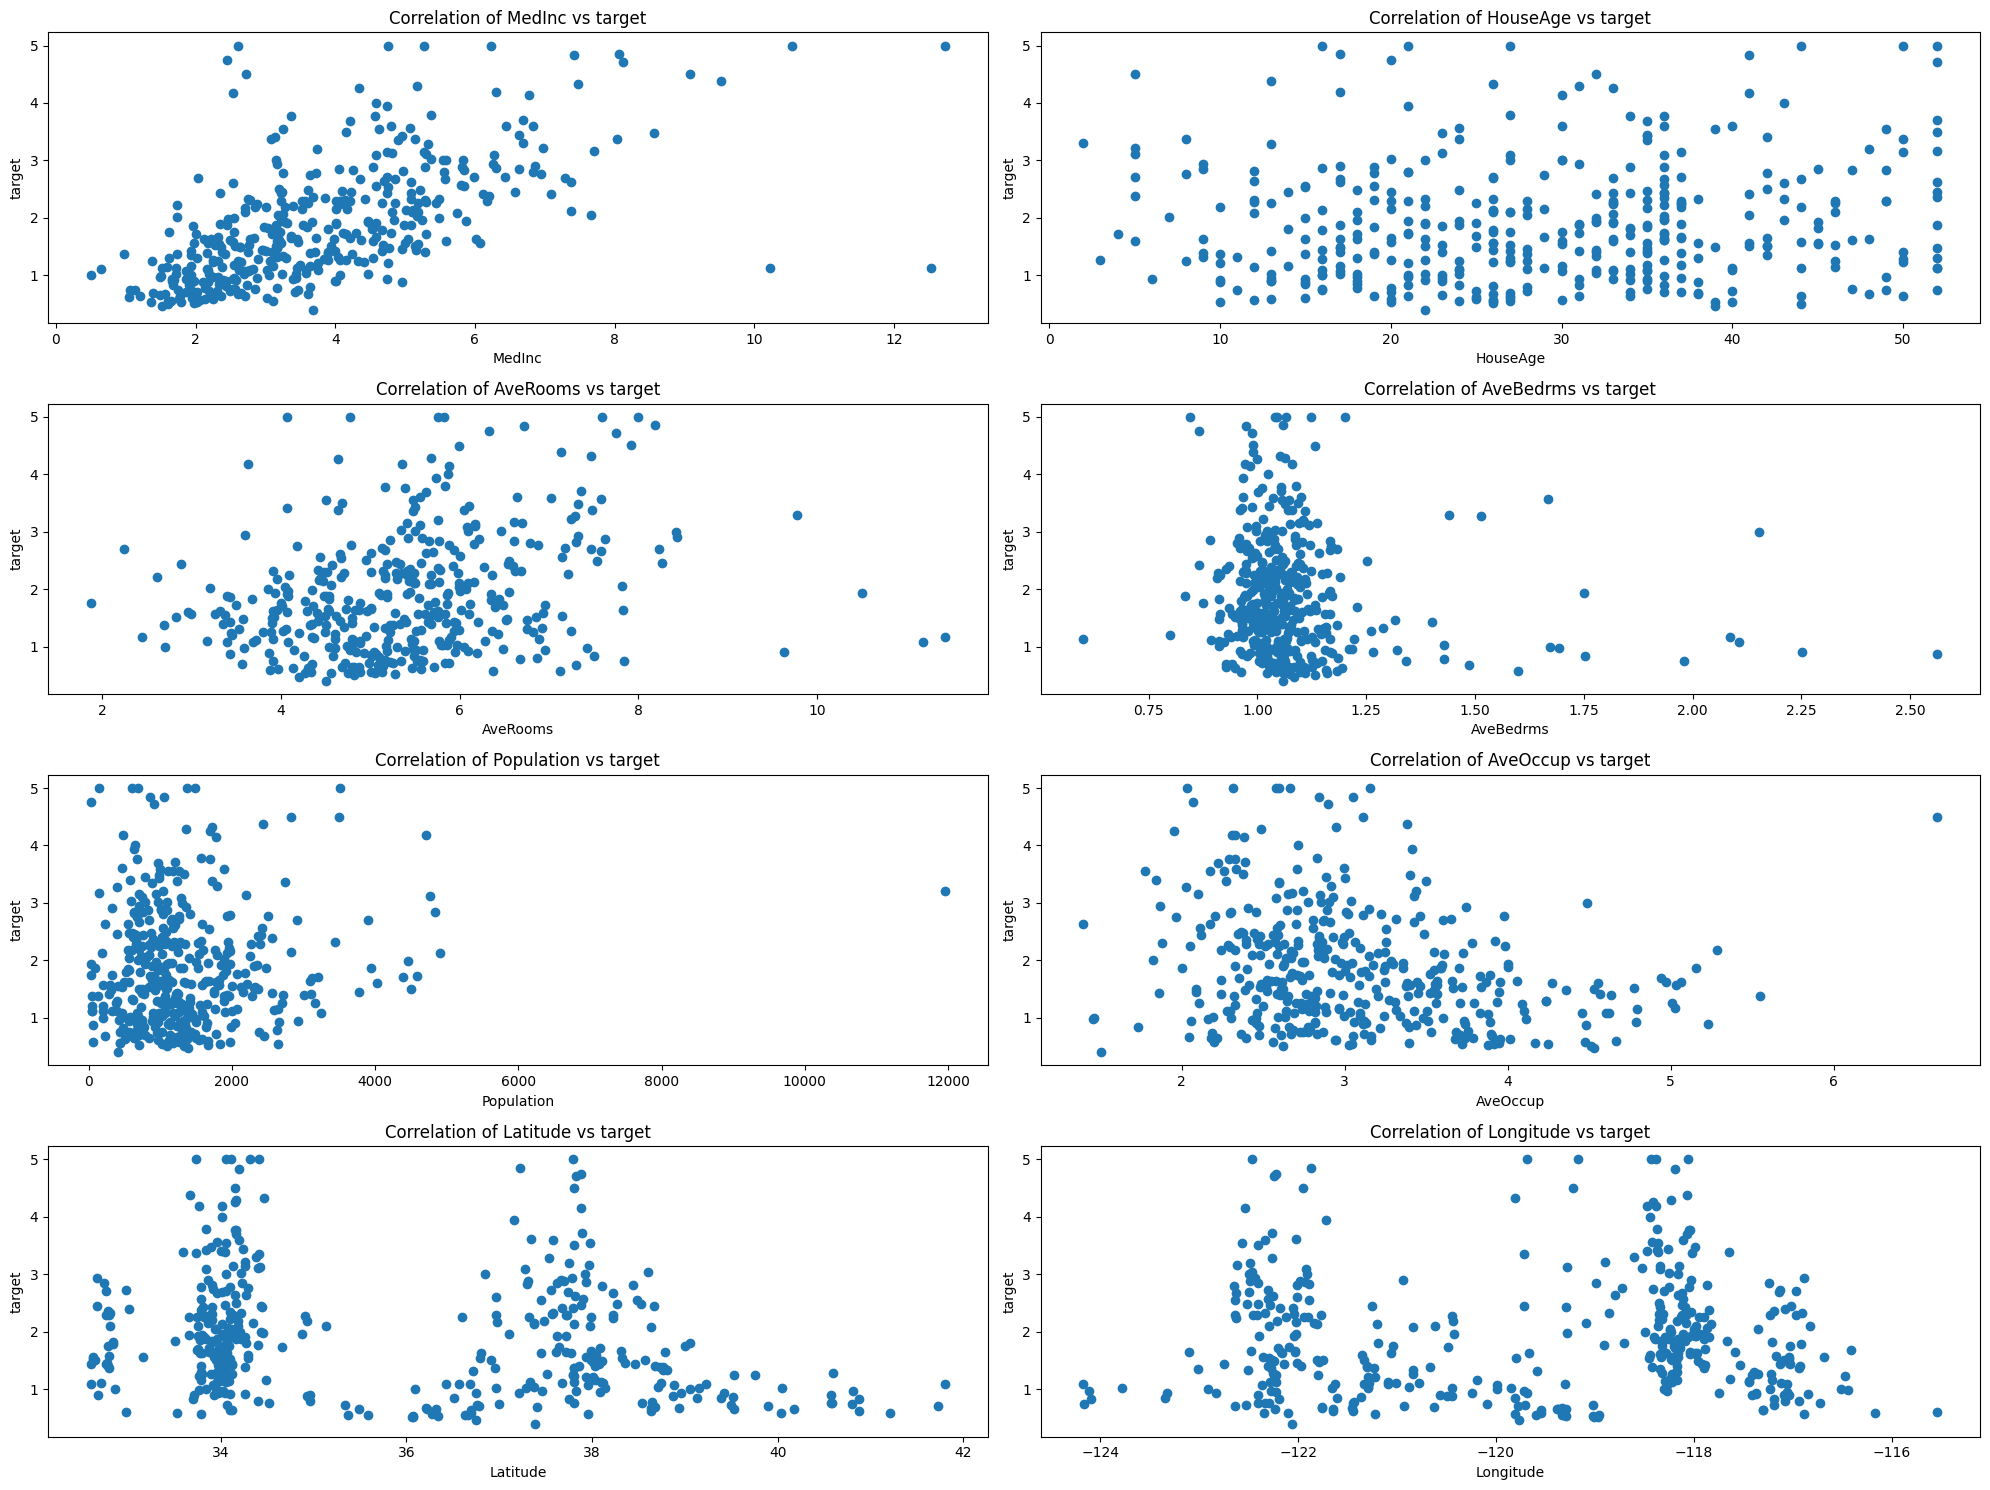

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each feature and create a box plot
for i, feature in enumerate(sampled_df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    plt.scatter(x=sampled_df[feature], y=sampled_df['target'])
    plt.title(f'Correlation of {feature} vs target')
    plt.xlabel(f'{feature}')
    plt.ylabel('target')
    plt.tight_layout()

plt.show()

In [143]:
sampled_df_clean = sampled_df.copy()

In [144]:
sampled_df_clean.duplicated().sum()

np.int64(0)

In [145]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

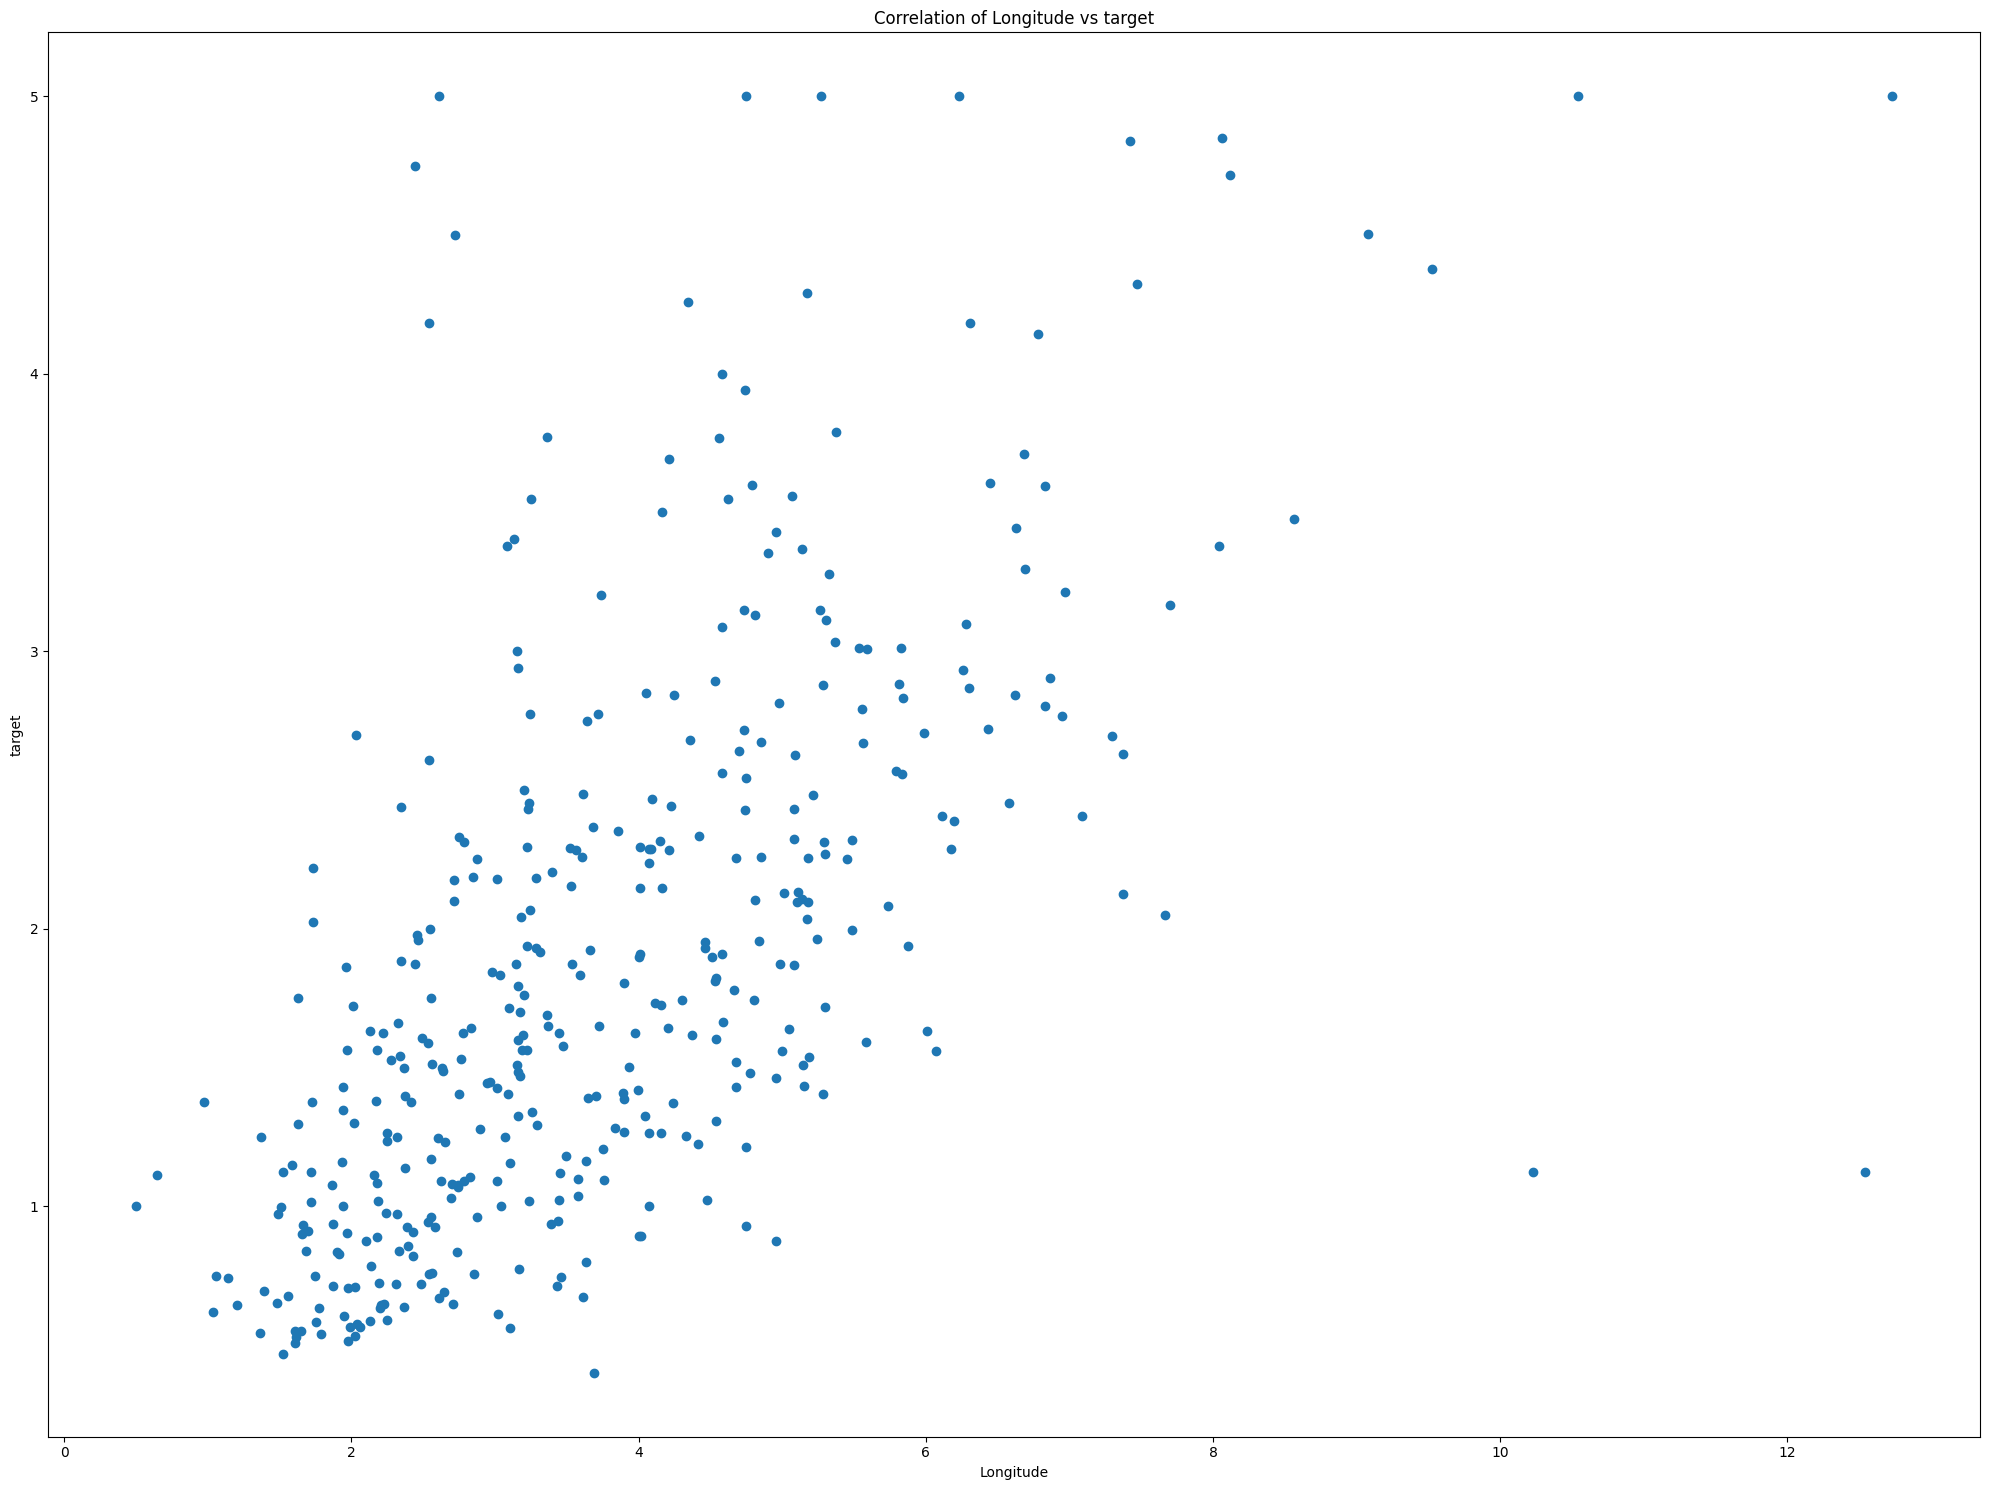

In [146]:
import numpy as np
X = np.array(sampled_df["MedInc"]).reshape(-1, 1)
y = np.array(sampled_df["target"])

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

plt.scatter(X, y)
plt.title(f'Correlation of {feature} vs target')
plt.xlabel(f'{feature}')
plt.ylabel('target')
plt.tight_layout()

plt.show()

In [147]:
model.fit(X, y)

LinearRegression()

[1.69323197 1.23755521 1.96672403 1.07357465 2.38466663 3.17016793
 2.42748935 1.36269073 1.78102751 1.67155185 1.66123139 1.33269691
 1.31764625 2.41569966 1.45328139 1.44367764 3.41671213 1.95962872
 1.3679943  1.99277601 1.19849516 1.30858001 1.24081619 2.06921188
 2.88553121 1.38526673 1.76225002 2.17069636 3.43817724 2.10916781
 1.37741888 1.90189867 2.26153786 1.49829004 3.01747536 2.3053998
 1.50764296 2.38262404 2.36854091 1.29141509 1.33301942 2.31898123
 1.68764173 1.46399603 1.47603656 1.6650299  2.63389845 2.49338975
 1.69212109 1.01774386 2.16965715 2.20115603 1.31302354 2.49356893
 2.39756719 1.4618101  2.01986721 2.01800379 1.86742549 1.14943716
 1.44106169 2.16356521 1.62851412 3.17027543 1.14857712 1.96486062
 2.98880743 1.52527373 2.01958053 1.25321507 1.40013822 1.40995698
 1.30556988 2.20542039 2.0862693  0.70773602 1.97991128 1.07425551
 1.84828964 1.66223477 1.50061931 1.66556742 3.27469837 2.09637475
 1.92279043 1.73659222 2.12873367 2.68263393 1.44568439 2.22667

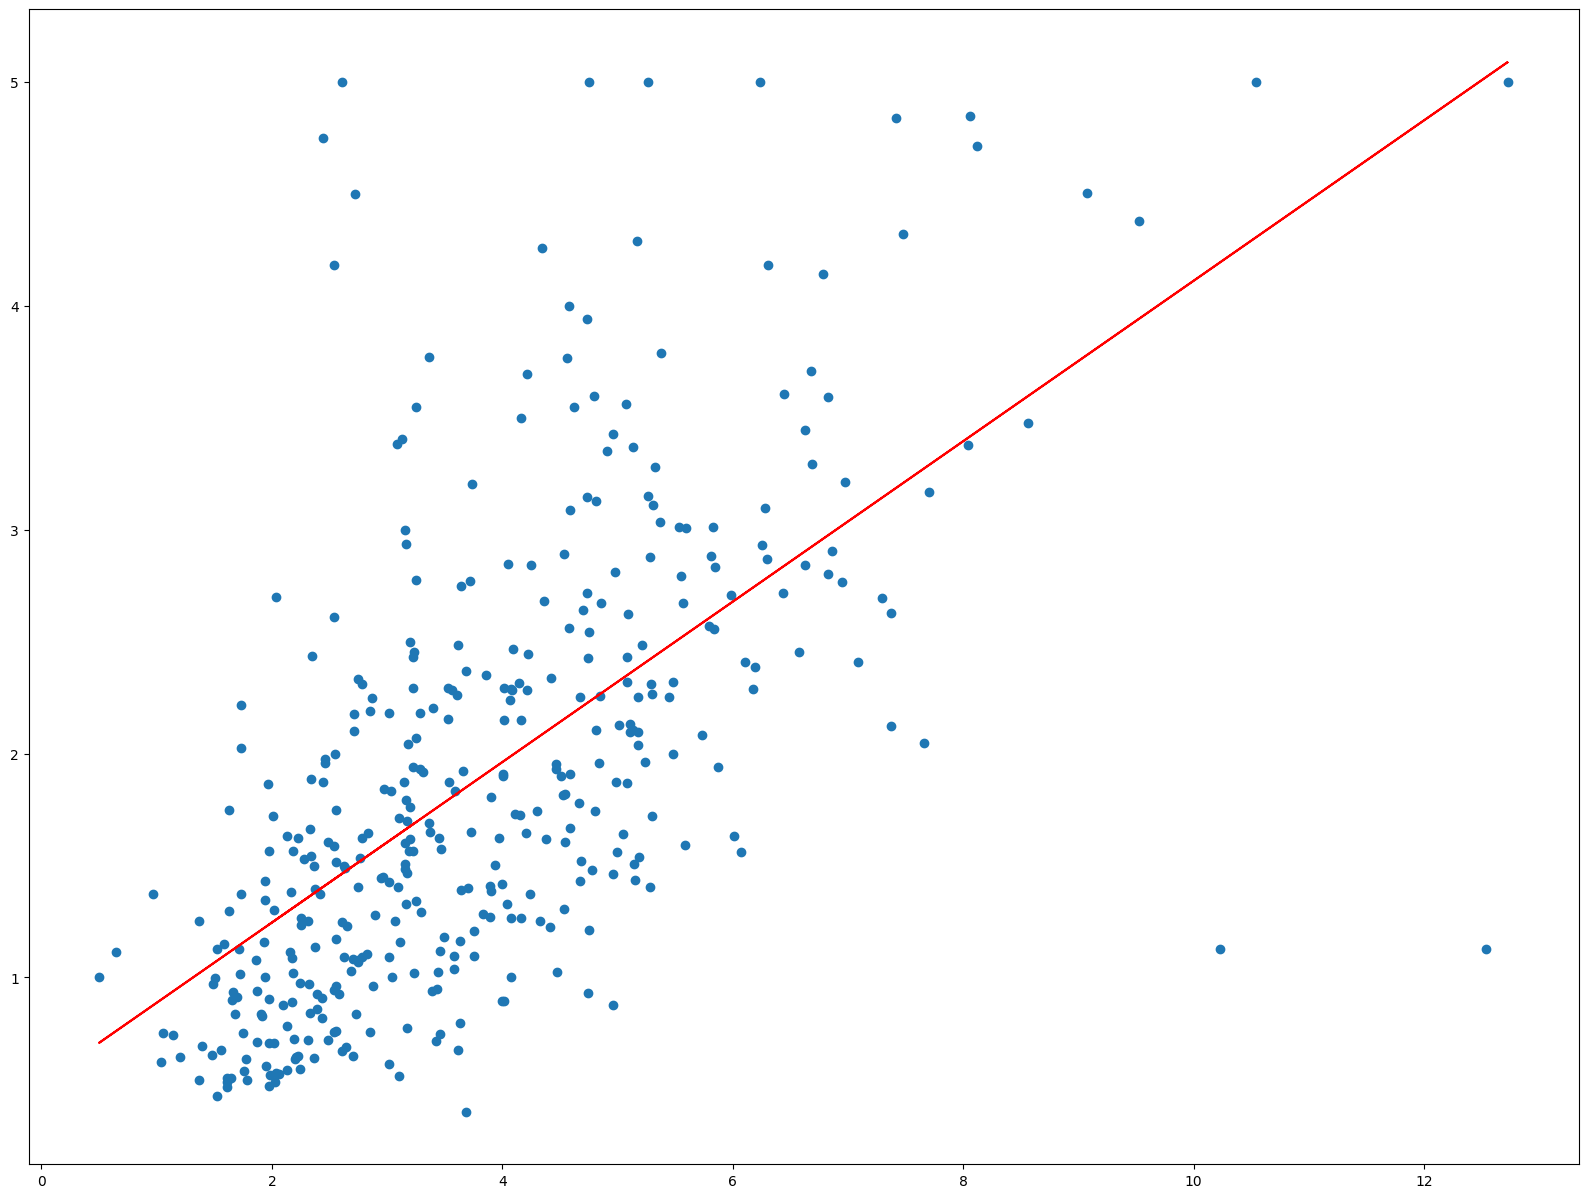

In [148]:
y_pred = model.predict(X)
print(y_pred)
plt.figure(figsize=(20, 15))
plt.scatter(X, y)
plt.plot(X, y_pred, color="red");

In [149]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y, y_pred)
print(mse)

0.6380170496972181


In [156]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
print(np.mean(scores))

0.3968685557642987
